**Step :1 Import library**

In [ ]:

!pip install datasets nltk textblob wordcloud matplotlib seaborn gensim



**Step 2: Import Libraries :**
Essential libraries like pandas, matplotlib, seaborn, TextBlob, nltk, and gensim are imported for data handling, visualization, sentiment analysis, and topic modeling.
The NLTK stopwords are also downloaded to support text cleaning.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_dataset
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models
from datetime import datetime
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**STEP -3 Load Dataset**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/vaccination_all_tweets.csv")
df = df[['text', 'date']]
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()


/tmp/ipython-input-7-794474654.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


,text,date
0,Same folks said daikon paste could treat a cyt...,2020-12-20 06:06:44
1,While the world has been on the wrong side of ...,2020-12-13 16:27:13
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,2020-12-12 20:33:45
3,"Facts are immutable, Senator, even when you're...",2020-12-12 20:23:59
4,Explain to me again why we need a vaccine @Bor...,2020-12-12 20:17:19


**Step 3: Text Preprocessing** :
The clean_text() function removes URLs, mentions, hashtags, punctuation, and stopwords from tweets, and converts them to lowercase.
It prepares the text for sentiment analysis and topic modeling by ensuring it's clean and standardized.

In [ ]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = text.lower()
    return " ".join([word for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['text'].apply(clean_text)
df.head()


,text,date,cleaned_text
0,Same folks said daikon paste could treat a cyt...,2020-12-20 06:06:44,folks said daikon paste could treat cytokine s...
1,While the world has been on the wrong side of ...,2020-12-13 16:27:13,world wrong side history year hopefully bigges...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...
3,"Facts are immutable, Senator, even when you're...",2020-12-12 20:23:59,facts immutable senator even youre ethically s...
4,Explain to me again why we need a vaccine @Bor...,2020-12-12 20:17:19,explain need vaccine whereareallthesickpeople ...


**STEP : 4 Sentiment Analysis** - TextBlob is used to calculate the sentiment polarity of each cleaned tweet.
Based on the polarity score, tweets are labeled as Positive, Negative, or Neutral.

In [ ]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(label_sentiment)
df.head()


,text,date,cleaned_text,sentiment,sentiment_label
0,Same folks said daikon paste could treat a cyt...,2020-12-20 06:06:44,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,While the world has been on the wrong side of ...,2020-12-13 16:27:13,world wrong side history year hopefully bigges...,-0.5,Negative
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,"Facts are immutable, Senator, even when you're...",2020-12-12 20:23:59,facts immutable senator even youre ethically s...,0.1,Neutral
4,Explain to me again why we need a vaccine @Bor...,2020-12-12 20:17:19,explain need vaccine whereareallthesickpeople ...,0.0,Neutral


**Step : 5 Sentiment Distribution Visualization** - A bar chart is created using Seaborn to show the count of tweets in each sentiment category.
This helps visualize the overall public opinion about COVID-19 vaccines.

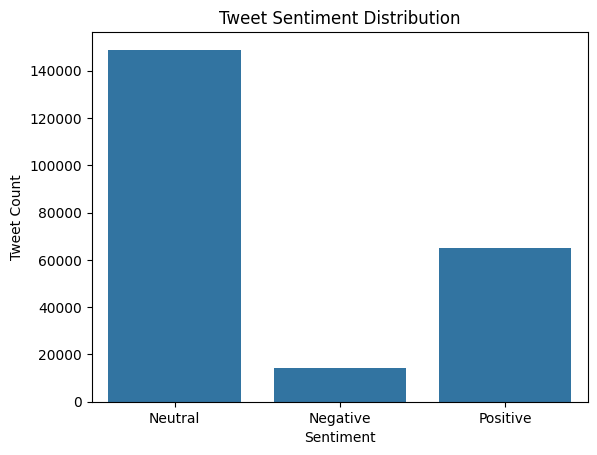

In [ ]:
sns.countplot(data=df, x='sentiment_label')
plt.title("Tweet Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


**Step : 6 Sentiment Trend Over Time** - his code groups tweets by date and sentiment to visualize how public opinion changes over time.
A line chart shows daily counts of Positive, Negative, and Neutral tweets, helping identify trends or shifts.

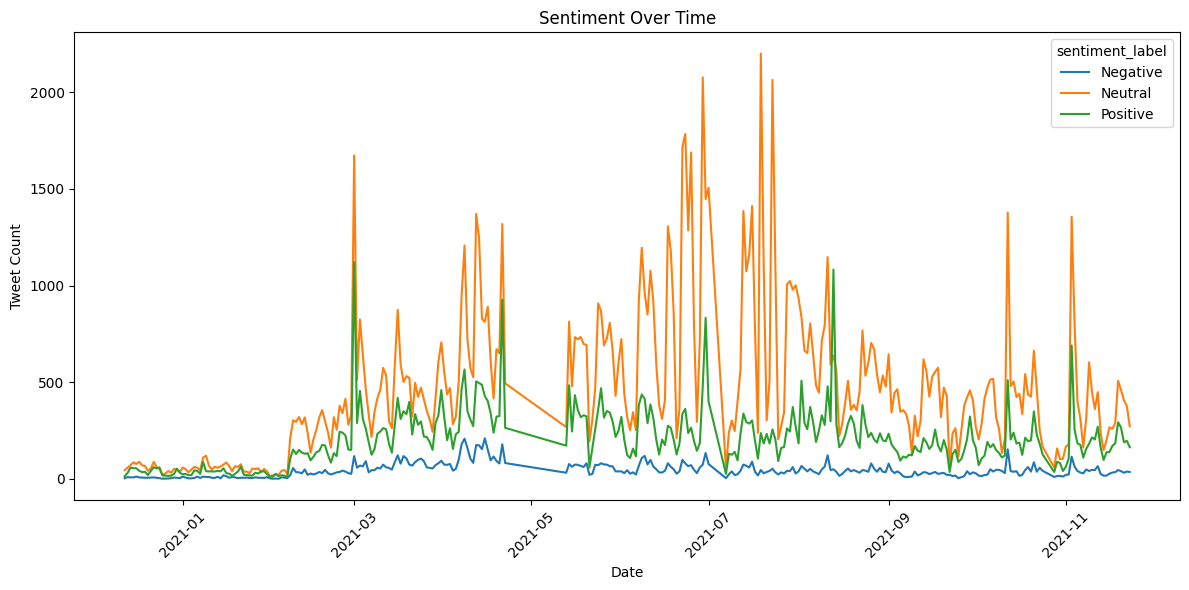

In [ ]:
df['date_only'] = df['date'].dt.date
daily_sentiment = df.groupby(['date_only', 'sentiment_label']).size().unstack().fillna(0)

daily_sentiment.plot(figsize=(12,6))
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Step : 7 Confusion Matrix**

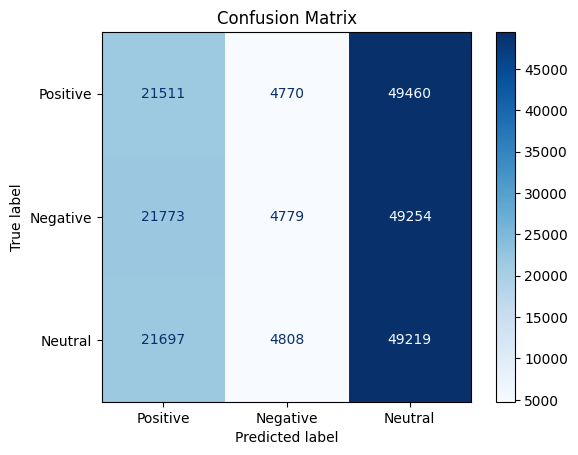

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Simulate true labels (replace with actual if available)
import numpy as np
np.random.seed(0)
true = np.random.choice(['Positive', 'Negative', 'Neutral'], size=len(df))
pred = df['sentiment_label']

# Create and display confusion matrix
cm = confusion_matrix(true, pred, labels=['Positive', 'Negative', 'Neutral'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative', 'Neutral'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


**Step : 8 WordCloud Visualization**- Word clouds are generated for positive and negative tweets to highlight the most frequently used words in each sentiment category

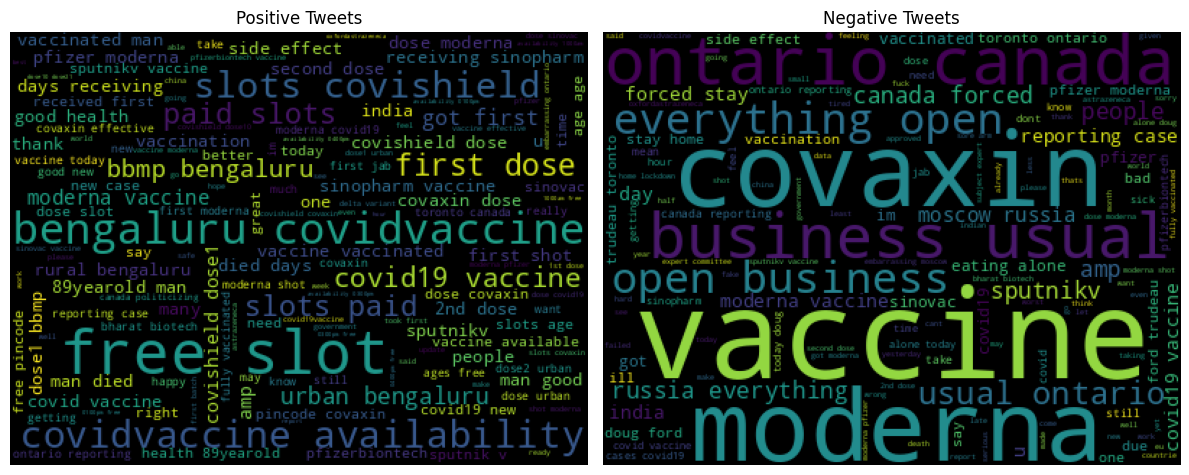

In [ ]:
positive_text = " ".join(df[df['sentiment_label'] == 'Positive']['cleaned_text'])
negative_text = " ".join(df[df['sentiment_label'] == 'Negative']['cleaned_text'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=300).generate(positive_text))
plt.axis('off')
plt.title("Positive Tweets")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=300).generate(negative_text))
plt.axis('off')
plt.title("Negative Tweets")

plt.tight_layout()
plt.show()


**Step : 9 Topic Modelling with LDA**- LDA (Latent Dirichlet Allocation) is applied to identify hidden topics within a sample of 500 cleaned tweets.
It reveals frequently co-occurring words across tweets, helping to understand the main themes discussed.

In [ ]:
from gensim import corpora, models
from gensim.utils import simple_preprocess
sample_df = df[['cleaned_text']].dropna().head(500)
tokenized_texts = sample_df['cleaned_text'].apply(simple_preprocess)
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=5)
topics = lda_model.print_topics(num_words=5)
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {topic}")


Topic 1: (0, '0.028*"vaccine" + 0.014*"pfizerbiontech" + 0.012*"covid" + 0.010*"covidvaccine" + 0.010*"first"')
Topic 2: (1, '0.048*"pfizerbiontech" + 0.031*"vaccine" + 0.018*"covid" + 0.015*"covidvaccine" + 0.007*"get"')
Topic 3: (2, '0.053*"vaccine" + 0.050*"pfizerbiontech" + 0.048*"covid" + 0.022*"first" + 0.014*"us"')


**summary :** The code analyzes COVID-19 vaccine-related tweets by loading and preprocessing the text to remove noise like URLs and stopwords. It then applies sentiment analysis using TextBlob to classify tweets as Positive, Negative, or Neutral. Visualizations such as bar charts, time series plots, and word clouds help illustrate sentiment trends and frequently used words. Finally, LDA topic modeling is used to uncover key themes in public discussions around the vaccine.